In [2]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==1.14.0
2.18.0


Assigning Path for Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/Rice_Image_Dataset_New.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

Importing Required Libraries

In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [6]:
# resize
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10
DATASET_PATH = '/content/Rice_Image_Dataset'

Augmenting the data

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


Making the model

In [8]:
# Load pretrained model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


compile the model

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [10]:
model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS)
# Evaluate model on validation set
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1202s 637ms/step - accuracy: 0.9168 - loss: 0.2713 - val_accuracy: 0.9775 - val_loss: 0.0715
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1188s 634ms/step - accuracy: 0.9779 - loss: 0.0660 - val_accuracy: 0.9791 - val_loss: 0.0637
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1187s 633ms/step - accuracy: 0.9816 - loss: 0.0543 - val_accuracy: 0.9845 - val_loss: 0.0498
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1182s 630ms/step - accuracy: 0.9819 - loss: 0.0517 - val_accuracy: 0.9745 - val_loss: 0.0702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1171s 603ms/step - accuracy: 0.9837 - loss: 0.0473 - val_accuracy: 0.9822 - val_loss: 0.0518
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1122s 598ms/step - accuracy: 0.9843 - loss: 0.0456 - val_accuracy: 0.9842 - val_loss: 0.0468
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1109s 591ms/step - accuracy: 0.9850 - loss: 0.0442 - val_accuracy: 0.9793 - val_loss: 0.0591
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1142s 609ms/s

Classification report

In [11]:
from sklearn.metrics import classification_report
import numpy as np

# Get class labels
labels = list(train_gen.class_indices.keys())

# Get true labels and predictions on the validation set
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 225s 476ms/step


In [12]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

Classification Report:

              precision    recall  f1-score   support

     Arborio       0.20      0.20      0.20      3000
     Basmati       0.20      0.20      0.20      3000
      Ipsala       0.20      0.20      0.20      3000
     Jasmine       0.20      0.21      0.21      3000
   Karacadag       0.19      0.19      0.19      3000

    accuracy                           0.20     15000
   macro avg       0.20      0.20      0.20     15000
weighted avg       0.20      0.20      0.20     15000



Visualizing confusion metrix

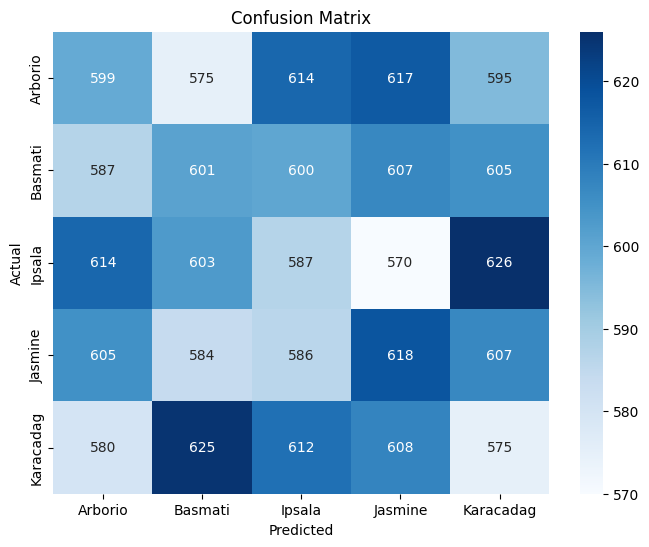

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Save the model

In [14]:
# Save the trained model to a file
model.save("model.h5")

In [15]:
# Verify the Model is Saved
# Load the model to verify
from tensorflow.keras.models import load_model
loaded_model = load_model("model.h5")
print("Model loaded successfully and ready for deployment.")

Model loaded successfully and ready for deployment.
